# Clustering

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from IPython.display import clear_output
sns.set()
np.random.seed(42)
%matplotlib inline

In [2]:
df = pd.read_csv('data/main_dataset.csv')
df.head()

,Unnamed: 0,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,...,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,best_pos
0,0,158023,32,170,72,94,94,95500000,565000,Left,...,96,33,37,26,6,11,15,14,8,Fwd_Winger
1,1,20801,34,187,83,93,93,58500000,405000,Right,...,95,28,32,24,7,11,15,14,11,Fwd_Centre
2,2,190871,27,175,68,92,92,105500000,290000,Right,...,94,27,26,29,9,9,15,15,11,Fwd_Winger
3,3,200389,26,188,87,91,93,77500000,125000,Right,...,68,27,12,18,87,92,78,90,89,Goal_Keeper
4,4,183277,28,175,74,91,91,90000000,470000,Right,...,91,34,27,22,11,12,6,8,8,Fwd_Winger


Select two feature for clustering

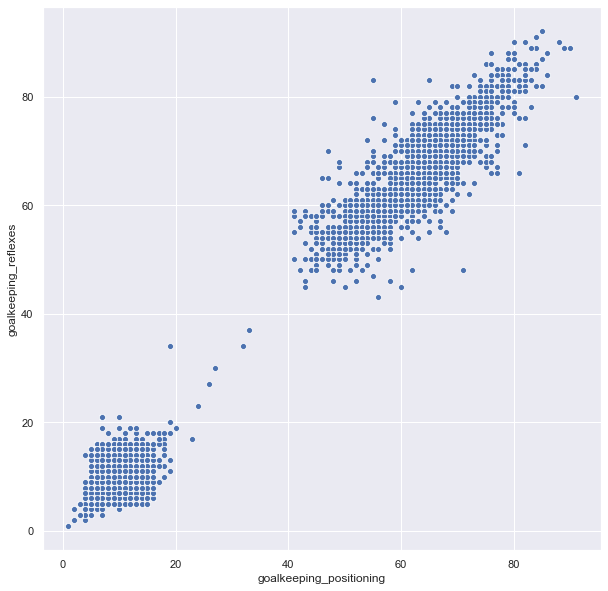

In [3]:
plt.figure(figsize=(10, 10))
sns.scatterplot(df['goalkeeping_positioning'],df['goalkeeping_reflexes'])

In [4]:
# remove outliers
# quantile_95 = df['weight_kg'].quantile(0.999)
# df_95 = df[df['weight_kg'] < quantile_95]

In [5]:
# plt.figure(figsize=(10, 10))
# sns.scatterplot(df_95['goalkeeping_positioning'],df_95['goalkeeping_reflexes'])

In [6]:
selected_columns = ['goalkeeping_positioning', 'goalkeeping_reflexes']
df = df[selected_columns]
df.head()

,goalkeeping_positioning,goalkeeping_reflexes
0,14,8
1,14,11
2,15,11
3,90,89
4,8,8


Check missing values

In [7]:
df_clean = df.copy()
nan_percentage = df_clean.isnull().sum().sort_values(ascending=False) / df_clean.shape[0]
missing_val = nan_percentage[nan_percentage > 0]
nan_percentage

goalkeeping_reflexes       0.0
goalkeeping_positioning    0.0
dtype: float64

### Define functions

In [51]:
def euclidean_distance(a, b): #calculate euclidean distance
    return np.sqrt(np.sum((a - b)**2))
def is_convergen(old, new, K): #check is new clusters convergen or not, if convergen it will stop the loop
    distances = [euclidean_distance(old[i], new[i]) for i in range(K)]
    return sum(distances) == 0
def select_centroid(data, centroids):
    distances = [euclidean_distance(data, point) for point in centroids]
    print(distances)
    return np.argmin(distances)
def get_centroids(clusters, K, n_features, X):
    # assign mean value of clusters to centroids
    centroids = np.zeros((K, n_features))
    for cluster_idx, cluster in enumerate(clusters):
        cluster_mean = np.mean(X[cluster], axis=0)
        centroids[cluster_idx] = cluster_mean
    return centroids

### Main Program

Define parameters

In [9]:
K = 2
max_iter = 100

Prepare cluster

In [49]:
X = np.array(df.head(100))
clusters = [[] for _ in range(K)]
n_data, n_feature = X.shape
cancel_token = True
i = 0
#init random centroid
rand_c = np.random.choice(n_data, K, replace=False)
centroids = [np.array(X[idx]) for idx in rand_c]

In [52]:
def kMeans(X, K = 2, max_iter = 100, verbose = True):
    X = np.array(X)
    n_data, n_feature = X.shape
    y = np.full(n_data, -1)
    cancel_token = True
    i = 0
    rand_c = np.random.choice(n_data, K, replace=False)
    centroids = [np.array(X[idx]) for idx in rand_c]
    
    while(i < max_iter and cancel_token):
        for idx, row in enumerate(X):
            
            y[idx] = select_centroid(row, centroids)
#             clusters[centroid_idx].append(idx)
            
        old_centroids = centroids #save old centroids
        #update new centroids
        temp = np.zeros((K, n_feature)) #
        for idx, cluster in enumerate(clusters) : #for each member of cluster, get mean value
            temp[idx] = np.mean(X[cluster])
        centroids = temp #UPDATE!
        if is_convergen(old_centroids, centroids, K):
            cancel_token = False
        i+=1
        
        if verbose:
            clear_output(wait=True)
            print('iteration = ' ,i)
    return y
kMeans(X, K, max_iter)

iteration =  100


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
X[0:,0]

array([14, 14, 15, 90,  8, 10, 88, 11, 14, 11], dtype=int64)

In [55]:
while(i < max_iter and cancel_token):
    for idx, row in enumerate(X):
        centroid_idx = select_centroid(row, centroids)
        clusters[centroid_idx].append(idx)
    old_centroids = centroids #save old centroids
    #update new centroids
    temp = np.zeros((K, n_feature)) #
    for idx, cluster in enumerate(clusters) : #for each member of cluster, get mean value
        temp[idx] = np.mean(X[cluster])
    centroids = temp #UPDATE!
    if is_convergen(old_centroids, centroids, K):
        cancel_token = False
    i+=1
    print('iteration = ' ,i)
    clear_output(wait=True)

In [31]:
for idx, cluster in enumerate(clusters):
    print(X[cluster])

[[90 89]
 [88 90]
 [90 89]
 ...
 [48 51]
 [47 51]
 [43 45]]
[[14  8]
 [14 11]
 [15 11]
 ...
 [ 6 14]
 [13 13]
 [ 9 10]]


### Print the output label

In [56]:
data_output = pd.DataFrame()
data_output['X'] = np.empty(n_data)
data_output['y'] = np.empty(n_data)
data_output['cluster'] = np.empty(n_data)

for cluster_idx, cluster in enumerate(clusters):
    for sample_index in cluster:
#         labels[sample_index] = cluster_idx
        data_output['X'][sample_index] = X[sample_index][0]
        data_output['y'][sample_index] = X[sample_index][1]        
        data_output['cluster'][sample_index] = cluster_idx      

In [57]:
data_output.head(10)

,X,y,cluster
0,14.0,8.0,1.0
1,14.0,11.0,1.0
2,15.0,11.0,1.0
3,90.0,89.0,0.0
4,8.0,8.0,1.0
5,10.0,13.0,1.0
6,88.0,90.0,0.0
7,11.0,11.0,1.0
8,14.0,9.0,1.0
9,11.0,14.0,1.0


### Plot the data

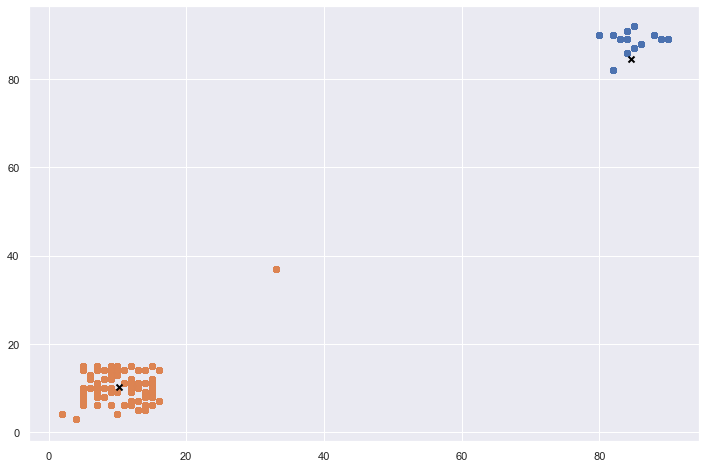

In [58]:
fig, ax = plt.subplots(figsize=(12, 8))
for i, index in enumerate(clusters):
    point = X[index].T
    ax.scatter(*point)
for point in centroids:
    ax.scatter(*point, marker="x", color='black', linewidth=2)
plt.show()

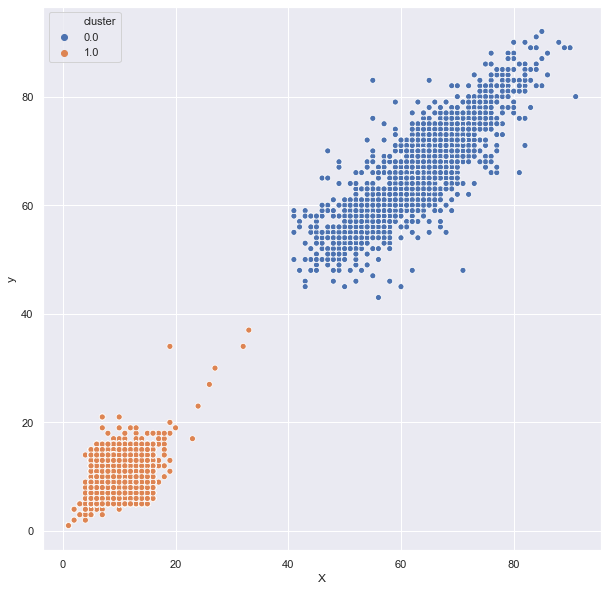

In [15]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='X', y='y', hue='cluster', data=data_output)
plt.show()

## Evaluate Score

Using silhouette coefficient

![Function](sihouette.jpg)

https://medium.com/@ODSC/assessment-metrics-for-clustering-algorithms-4a902e00d92d

In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [17]:
output_labels = np.zeros(X.shape[0])
for i in range(len(clusters)):
    for j in range(len(clusters[i])):
        output_labels[clusters[i][j]] = i
output_labels[:100]

array([1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
result = silhouette_samples(X,output_labels)
result

array([0.92769251, 0.93169168, 0.9222275 , ..., 0.91564805, 0.9311643 ,
       0.94663444])

In [19]:
np.mean(result)

0.9160930424847247

The average score is close to 1 so it can be as an ‘appropriate’ cluster.